# Task 1 Pre-process

In [105]:
# In this part, combine 4 files, delete duplicates None, and text from professionals or celebrities 
# (keep those from cumtomers only)

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [27]:
file_paths = [
    'Diabetes Reddit Only Q1 2023.xlsx',
    'Diabetes Reddit Only Q2 2023.xlsx',
    'Diabetes Reddit Only Q3 2023.xlsx',
    'Diabetes Reddit Only Q4 2023.xlsx'
]

# combine
data = pd.concat([pd.read_excel(file) for file in file_paths], ignore_index=True)

In [28]:
# overview
print(f'length of data = {len(data)}')
data.info()

length of data = 29452
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      27687 non-null  object 
 1   Sound Bite Text                              29440 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        27663 non-null  object 
 4   Source Type                                  27663 non-null  object 
 5   Post Type                                    27663 non-null  object 
 6   Is Paid                                      29408 non-null  object 
 7   Media Type                                   27663 non-null  object 
 8   URL                                          27663 non-null  object 
 9   Media Link                                   0 no

In [60]:
# delete 'Sound Bite Text' column value = "Post deleted by the author." 
data_filtered = data[data['Sound Bite Text'] != "Post deleted by the author."]
# delete 'Sound Bite Text' column value = None
data_filtered = data_filtered.dropna(subset=['Sound Bite Text'])

# overview
print(f'Number of entries deleted = {len(data)-len(data_filtered)}')
data_filtered.info()

Number of entries deleted = 1757
<class 'pandas.core.frame.DataFrame'>
Index: 27695 entries, 0 to 29451
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      27683 non-null  object 
 1   Sound Bite Text                              27695 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        27663 non-null  object 
 4   Source Type                                  27663 non-null  object 
 5   Post Type                                    27663 non-null  object 
 6   Is Paid                                      27663 non-null  object 
 7   Media Type                                   27663 non-null  object 
 8   URL                                          27663 non-null  object 
 9   Media Link                                  

In [62]:
# Remove duplicate rows from 'Sound Bite Text' column
data_unique = data_filtered.drop_duplicates(subset=['Sound Bite Text'], keep='first')

# overview
print(f'Number of entries deleted = {len(data)-len(data_unique)}') # cumulatively deleted 2093
data_unique.info()

Number of entries deleted = 2093
<class 'pandas.core.frame.DataFrame'>
Index: 27359 entries, 0 to 29451
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      27356 non-null  object 
 1   Sound Bite Text                              27359 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        27345 non-null  object 
 4   Source Type                                  27345 non-null  object 
 5   Post Type                                    27345 non-null  object 
 6   Is Paid                                      27345 non-null  object 
 7   Media Type                                   27345 non-null  object 
 8   URL                                          27345 non-null  object 
 9   Media Link                                  

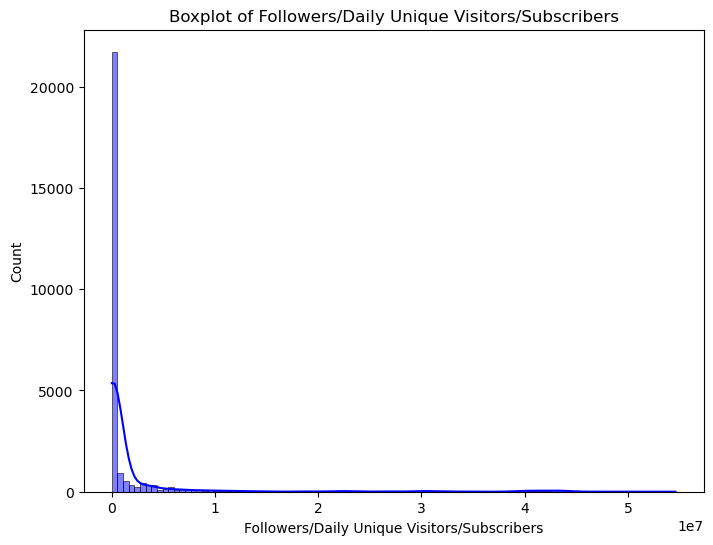

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
# boxplot
plt.figure(figsize=(8, 6))
# sns.boxplot(data_unique['Followers/Daily Unique Visitors/Subscribers'].dropna(), color='orange')
sns.histplot(data_unique['Followers/Daily Unique Visitors/Subscribers'].dropna(), bins=100, color='blue', kde=True)
plt.title('Boxplot of Followers/Daily Unique Visitors/Subscribers')
plt.ylabel('Count')
plt.show()

In [87]:
# only keep 'Followers/Daily Unique Visitors/Subscribers' column value <= 10 millions
# maybe Daily Unique Visitors
data_preprocessed = data_unique[data_unique['Followers/Daily Unique Visitors/Subscribers'] <= 10000000]

# overview
print(f'Number of entries deleted = {len(data)-len(data_preprocessed)}') # cumulatively deleted 3635
data_preprocessed.info()

Number of entries deleted = 3635
<class 'pandas.core.frame.DataFrame'>
Index: 25817 entries, 0 to 29440
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      25817 non-null  object 
 1   Sound Bite Text                              25817 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        25817 non-null  object 
 4   Source Type                                  25817 non-null  object 
 5   Post Type                                    25817 non-null  object 
 6   Is Paid                                      25817 non-null  object 
 7   Media Type                                   25817 non-null  object 
 8   URL                                          25817 non-null  object 
 9   Media Link                                  

In [89]:
# keep 'Post ID' column in form 'BRDRDT2'
data_preprocessed = data_preprocessed[data_preprocessed['Post ID'].str.contains('BRDRDT2', na=False)]

# overview
print(f'Number of entries deleted = {len(data)-len(data_preprocessed)}') # cumulatively deleted 3635
data_preprocessed.info()

Number of entries deleted = 3635
<class 'pandas.core.frame.DataFrame'>
Index: 25817 entries, 0 to 29440
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      25817 non-null  object 
 1   Sound Bite Text                              25817 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        25817 non-null  object 
 4   Source Type                                  25817 non-null  object 
 5   Post Type                                    25817 non-null  object 
 6   Is Paid                                      25817 non-null  object 
 7   Media Type                                   25817 non-null  object 
 8   URL                                          25817 non-null  object 
 9   Media Link                                  

In [91]:
# save
data_preprocessed.to_excel('Diabetes_Reddit_Only_preprocessed.xlsx', index=False)

In [97]:
data_preprocessed.head()

,Post ID,Sound Bite Text,Ratings and Scores,Title,Source Type,Post Type,Is Paid,Media Type,URL,Media Link,...,LexisNexis Person - High,LexisNexis Person - Any,LexisNexis Institution - High,LexisNexis Institution - Any,LexisNexis Subject Group 1,LexisNexis Subject 1,LexisNexis Subject Group 2,LexisNexis Subject 2,LexisNexis Other Subjects,Published Date (GMT-05:00) New York
0,BRDRDT2-t1_j4ocj3s,I’m so curious… it sounds like you are diabeti...,NaN,Goodbye Mounjaro. I hope to use you again.,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/Mounjaro/comments/10d...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRDRDT2-t1_j5sht0d,thank you so much seriously :),NaN,just diagnosed. please help,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/Type1Diabetes/comment...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BRDRDT2-t1_j838cu6,"Yep, that's what I was asking. ??",NaN,My TIR hasn't surpassed 50% in 8+ years...TODA...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/diabetes_t1/comments/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRDRDT2-t1_j8dw850,No tanker endorsement plus a recent diabetes d...,NaN,What’s stopping y’all from going local hauling...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/Truckers/comments/110...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BRDRDT2-t1_jbq1rwj,It spikes blood sugar which crashes and so it ...,NaN,What popular food is most responsible for maki...,Forums,Replies and Comments,No,No Media,https://www.reddit.com/r/AskMen/comments/11n6g...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 3 Analysis on text mentioned other diseases/comorbidities

## Chronic Complications

In [107]:
# data included 'obesity' or 'Obesity' 
obesity_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('obesity', case=False, na=False)].shape[0]

print(f"Number of data mentioned obesity : {obesity_count}")

Number of data mentioned obesity : 536


In [111]:
# data included 'heart health'
heart_health_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('heart health', case=False, na=False)].shape[0]

print(f"Number of data mentioned heart health : {heart_health_count}")

Number of data mentioned heart health : 28


In [115]:
# data included 'blood pressure'
blood_pressure_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('blood pressure', case=False, na=False)].shape[0]

print(f"Number of data mentioned blood pressure : {blood_pressure_count}")

Number of data mentioned blood pressure : 548


In [117]:
# data included 'kidney'
kidney_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('kidney', case=False, na=False)].shape[0]

print(f"Number of data mentioned kidney : {kidney_count}")

Number of data mentioned kidney : 390


## Acute Complications

In [119]:
# data included 'Diabetic Ketoacidosis (DKA)' particularly for Type 1
DKA_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('DKA', case=False, na=False)].shape[0]

print(f"Number of data mentioned DKA : {DKA_count}")

Number of data mentioned DKA : 186


In [122]:
# data included 'Hyperglycemic Hyperosmolar State (HHS)' particularly for Type 2
HHS_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('HHS', case=False, na=False)].shape[0]

print(f"Number of data mentioned HHS : {HHS_count}")

Number of data mentioned HHS : 6


In [125]:
# data included 'Hypoglycemia'
Hypoglycemia_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('Hypoglycemia', case=False, na=False)].shape[0]

print(f"Number of data mentioned Hypoglycemia : {Hypoglycemia_count}")

Number of data mentioned Hypoglycemia : 376


# Task 5 Analysis on text related to insulin

In [130]:
# data included 'insulin' or 'Insulin' 
insulin_count = data_preprocessed[data_preprocessed['Sound Bite Text'].str.contains('insulin', case=False, na=False)].shape[0]

print(f"Number of data mentioned insulin : {insulin_count}")

Number of data mentioned insulin : 3199


# Task 7&8 CGM Analysis via LLM(GPT-4)

In [159]:
# Selecting the required rows and columns to analyze for CGM, sentiment, and comorbidities
selected_rows = data_preprocessed.loc[1:1000, ["Sound Bite Text", "Title"]]

# Displaying the rows to analyze the text for extraction
selected_rows

,Sound Bite Text,Title
2,thank you so much seriously :),just diagnosed. please help
3,"Yep, that's what I was asking. ??",My TIR hasn't surpassed 50% in 8+ years...TODA...
4,No tanker endorsement plus a recent diabetes d...,What’s stopping y’all from going local hauling...
5,It spikes blood sugar which crashes and so it ...,What popular food is most responsible for maki...
6,I’ve had a non-diabetic A1C for a year without...,How did you view food before your T2D diagnosi...
...,...,...
996,Wow ??Lucky you. How were you able to get 3 mo...,Just finished 1st month of Trulicity .75mg. Tr...
997,Dave Ramsey has diabetes.,Tonal hikes monthly membership subscription 20...
998,"I am not a dog person, or pets I’m general rea...",AITA for not letting my friend bring his servi...
999,Has anyone else seen an increase in issues wit...,Quality Issues?


In [161]:
import re

# Define the possible CGM brands and general function for extracting information
CGM_brands = ["Dexcom", "Libre", "FreeStyle Libre", "Guardian", "Eversense"]
comorbidities_list = ["High Blood Pressure", "Obesity", "Cardiovascular", "Heart Disease", "Hypertension", 
                      "Diabetes", "Type 1 Diabetes", "Type 2 Diabetes", "Prediabetes", "Cholesterol", "PCOS", "NAFLD", 
                      "Liver Disease", "Kidney Disease", "Neuropathy", "Eye Disease"]

# Function to identify CGM brand, sentiment, and comorbidities in each row
def extract_info(text):
    # Find CGM brand
    CGM = next((brand for brand in CGM_brands if brand.lower() in text.lower()), None)
    
    # Determine sentiment (simplified approach using keywords)
    if any(word in text.lower() for word in ["glad", "good", "better", "love", "like", "satisfied"]):
        sentiment = "Positive"
    elif any(word in text.lower() for word in ["bad", "worse", "hate", "dislike", "struggle", "difficult"]):
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    # Extract comorbidities
    comorbidities = [disease for disease in comorbidities_list if disease.lower() in text.lower()]
    comorbidities = ", ".join([f'"{disease}"' for disease in comorbidities]) if comorbidities else None
    
    return CGM if CGM else "Unknown", sentiment, comorbidities if comorbidities else "None"

# Applying extraction to selected rows
extracted_data = selected_rows["Sound Bite Text"].apply(extract_info)
extracted_data_df = pd.DataFrame(extracted_data.tolist(), columns=["CGM", "Sentiment", "Comorbidity"])

# Combine the original data with the extracted information for clarity
results_CGM = pd.concat([selected_rows.reset_index(drop=True), extracted_data_df], axis=1)
results_CGM

,Sound Bite Text,Title,CGM,Sentiment,Comorbidity
0,thank you so much seriously :),just diagnosed. please help,Unknown,Neutral,None
1,"Yep, that's what I was asking. ??",My TIR hasn't surpassed 50% in 8+ years...TODA...,Unknown,Neutral,None
2,No tanker endorsement plus a recent diabetes d...,What’s stopping y’all from going local hauling...,Unknown,Neutral,"""Diabetes"""
3,It spikes blood sugar which crashes and so it ...,What popular food is most responsible for maki...,Unknown,Neutral,None
4,I’ve had a non-diabetic A1C for a year without...,How did you view food before your T2D diagnosi...,Unknown,Positive,None
...,...,...,...,...,...
868,Wow ??Lucky you. How were you able to get 3 mo...,Just finished 1st month of Trulicity .75mg. Tr...,Unknown,Neutral,None
869,Dave Ramsey has diabetes.,Tonal hikes monthly membership subscription 20...,Unknown,Neutral,"""Diabetes"""
870,"I am not a dog person, or pets I’m general rea...",AITA for not letting my friend bring his servi...,Unknown,Positive,None
871,Has anyone else seen an increase in issues wit...,Quality Issues?,Unknown,Negative,None


In [163]:
results_CGM_filtered = results_df[results_df['CGM'] != "Unknown"]
results_CGM_filtered

,Sound Bite Text,Title,CGM,Sentiment,Comorbidity
43,"It was, although i did notice that i had gotte...","I love dexcom, fyi im not dead",Dexcom,Neutral,None
190,I remember pricking my finger 8x per day and n...,According to CHATGPT we should stay hopefull,Dexcom,Neutral,None
196,I’m currently on the x2 and have had really gr...,Omnipod 5 or Tslim x2,Dexcom,Positive,None
237,I went through twice in December with no issue...,For those with CGMs…,Libre,Positive,None
254,i’ve been told by dexcom techs to avoid calibr...,Calibration question,Dexcom,Positive,None
308,Been using Dexcom for about 6 years now and du...,Dexcom has gotten so progressively bad over th...,Dexcom,Positive,None
310,I got the paddles on 3 occasions in 2 days whi...,Anybody here ever been given the paddles of life?,Libre,Neutral,None
391,Lost over 70 lbs without much work since diagn...,Who’s lost weight and diabetes?,Dexcom,Positive,None
434,4-5 hours is usually the time when I'm getting...,How long after eating can sugars rise?,Libre,Positive,"""Diabetes"""
453,"Make a mandatory report. The ""acid coming out ...",Question about Diabetic Child's Welfare,Guardian,Positive,None


In [165]:
results_df_filtered2 = results_df[results_df['Comorbidity'] != "None"]
results_df_filtered2

,Sound Bite Text,Title,CGM,Sentiment,Comorbidity
2,No tanker endorsement plus a recent diabetes d...,What’s stopping y’all from going local hauling...,Unknown,Neutral,"""Diabetes"""
8,"There’s T2 brought on by obesity, there’s insu...",Please be respectful,Unknown,Negative,"""Obesity"""
9,Is this about an ad about a guy who got diabet...,Ayah suka makan nasi,Unknown,Neutral,"""Diabetes"""
10,My PCP thinks it would be best to for me to ta...,Has anybody requested an accommodation by doin...,Unknown,Neutral,"""Diabetes"""
15,"Good luck everyone - I'm CNS diabetes, and I'v...",Everybody out! ✊??,Unknown,Positive,"""Diabetes"""
...,...,...,...,...,...
863,"Sunflower seeds may help lower blood pressure,...",watching season 20 of law and order svu,Unknown,Neutral,"""Cholesterol"""
864,Well…????‍♀️ Beats me lol I’m a loss and as yo...,6.4 vs 6.5 a1c,Unknown,Positive,"""Diabetes"""
867,Y'all are so cute I could smack you for giving...,It's been over a decade since I was on this su...,Unknown,Neutral,"""Diabetes"""
869,Dave Ramsey has diabetes.,Tonal hikes monthly membership subscription 20...,Unknown,Neutral,"""Diabetes"""


In [167]:
# save
results_CGM.to_csv('CGM and the comorbidities or diseases.csv', index=False)